**Exploratory Data Analysis (EDA) on AMCAT Dataset**

**STEP 1**

---



In this project, we're analyzing the AMCAT (Aspiring Minds Computer Adaptive Test) dataset, which contains employment outcomes of engineering graduates. Our goal is to uncover insights about factors influencing job placement and salaries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Step - 2**

---



In [35]:
df = pd.read_excel('/content/data.xlsx')
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [36]:
df = df.drop('Unnamed: 0', axis=1)
df.columns = df.columns.str.lower()
print(df.columns)

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')


In [37]:
df['dol'] = df['dol'].apply(lambda x: "Not_Present" if x != "present" else x)
df.head()


,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,Not_Present,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [38]:
city = df['jobcity'].unique()
print(city)


['Bangalore' 'Indore' 'Chennai' 'Gurgaon' 'Manesar' 'Hyderabad' 'Banglore'
 'Noida' 'Kolkata' 'Pune' -1 'mohali' 'Jhansi' 'Delhi' 'Hyderabad '
 'Bangalore ' 'noida' 'delhi' 'Bhubaneswar' 'Navi Mumbai' 'Mumbai'
 'New Delhi' 'Mangalore' 'Rewari' 'Gaziabaad' 'Bhiwadi' 'Mysore' 'Rajkot'
 'Greater Noida' 'Jaipur' 'noida ' 'HYDERABAD' 'mysore' 'THANE'
 'Maharajganj' 'Thiruvananthapuram' 'Punchkula' 'Bhubaneshwar' 'Pune '
 'coimbatore' 'Dhanbad' 'Lucknow' 'Trivandrum' 'kolkata' 'mumbai'
 'Gandhi Nagar' 'Una' 'Daman and Diu' 'chennai' 'GURGOAN' 'vsakhapttnam'
 'pune' 'Nagpur' 'Bhagalpur' 'new delhi - jaisalmer' 'Coimbatore'
 'Ahmedabad' 'Kochi/Cochin' 'Bankura' 'Bengaluru' 'Mysore ' 'Kanpur '
 'jaipur' 'Gurgaon ' 'bangalore' 'CHENNAI' 'Vijayawada' 'Kochi' 'Beawar'
 'Alwar' 'NOIDA' 'Greater noida' 'Siliguri ' 'raipur' 'gurgaon' 'Bhopal'
 'Faridabad' 'Jodhpur' 'udaipur' 'Muzaffarpur' 'Kolkata`' 'Bulandshahar'
 'Haridwar' 'Raigarh' 'Visakhapatnam' 'Jabalpur' 'hyderabad' 'Unnao'
 'KOLKATA' 'Thane'

In [41]:
city_mapping = {
'bangalore': 'Bangalore',
'banglore': 'Bangalore',
'banagalore': 'Bangalore',
'bengaluru': 'Bangalore',
'asifabadbanglore':'Bangalore',
'indore': 'Indore',
'chennai': 'Chennai',
'gurgaon': 'Gurgaon',
'gurgoan': 'Gurgaon',
'gurga': 'Gurgaon',
'manesar': 'Manesar',
'hyderabad': 'Hyderabad',
'hderabad': 'Hyderabad',
'hyderabad(bhadurpally)': 'Hyderabad',
'noida': 'Noida',
'nouda': 'Noida',
'kolkata': 'Kolkata',
'kolkata`': 'Kolkata',
'pune': 'Pune',
'-1': 'Unknown',
'mohali': 'Mohali',
'jhansi': 'Jhansi',
'delhi': 'Delhi',
'new delhi': 'New Delhi',
'bhubaneswar': 'Bhubaneswar',
'bhubaneshwar': 'Bhubaneswar',
'navi mumbai': 'Navi Mumbai',
'mumbai': 'Mumbai',
'mangalore': 'Mangalore',
'rewari': 'Rewari',
'gaziabaad': 'Ghaziabad',
'ghaziabad': 'Ghaziabad',
'bhiwadi': 'Bhiwadi',
'mysore': 'Mysore',
'rajkot': 'Rajkot',
'greater noida': 'Greater Noida',
'jaipur': 'Jaipur',
'thane': 'Thane',
'maharajganj': 'Maharajganj',
'thiruvananthapuram': 'Thiruvananthapuram',
'punchkula': 'Panchkula',
'coimbatore': 'Coimbatore',
'dhanbad': 'Dhanbad',
'lucknow': 'Lucknow',
'trivandrum': 'Thiruvananthapuram',
'gandhi nagar': 'Gandhinagar',
'una': 'Una',
'daman and diu': 'Daman and Diu',
'vsakhapttnam': 'Visakhapatnam',
'nagpur': 'Nagpur',
'bhagalpur': 'Bhagalpur',
'new delhi - jaisalmer': 'New Delhi',
'ahmedabad': 'Ahmedabad',
'kochi/cochin': 'Kochi',
'bankura': 'Bankura',
'kanpur': 'Kanpur',
'vijayawada': 'Vijayawada',
'kochi': 'Kochi',
'beawar': 'Beawar',
'alwar': 'Alwar',
'siliguri': 'Siliguri',
'raipur': 'Raipur',
'bhopal': 'Bhopal',
'faridabad': 'Faridabad',
'jodhpur': 'Jodhpur',
'udaipur': 'Udaipur',
'muzaffarpur': 'Muzaffarpur',
'bulandshahar': 'Bulandshahar',
'haridwar': 'Haridwar',
'raigarh': 'Raigarh',
'visakhapatnam': 'Visakhapatnam',
'jabalpur': 'Jabalpur',
'unnao': 'Unnao',
'aurangabad': 'Aurangabad',
'belgaum': 'Belgaum',
'dehradun': 'Dehradun',
'rudrapur': 'Rudrapur',
'jamshedpur': 'Jamshedpur',
'vizag': 'Visakhapatnam',
'nouda': 'Noida',
'dharamshala': 'Dharamshala',
'hissar': 'Hisar',
'ranchi': 'Ranchi',
'madurai': 'Madurai',
'chandigarh': 'Chandigarh',
'australia': 'Australia',
'cheyyar': 'Cheyyar',
'sonepat': 'Sonepat',
'pantnagar': 'Pantnagar',
'jagdalpur': 'Jagdalpur',
'angul': 'Angul',
'baroda': 'Vadodara',
'ariyalur': 'Ariyalur',
'jowai': 'Jowai',
'neemrana': 'Neemrana',
'tirupathi': 'Tirupati',
'bhubneshwar': 'Bhubaneswar',
'calicut': 'Kozhikode',
'gandhinagar': 'Gandhinagar',
'dubai': 'Dubai',
'ahmednagar': 'Ahmednagar',
'nashik': 'Nashik',
'bellary': 'Bellary',
'ludhiana': 'Ludhiana',
'muzaffarnagar': 'Muzaffarnagar',
'gagret': 'Gagret',
'indirapuram, ghaziabad': 'Ghaziabad',
'gwalior': 'Gwalior',
'chennai & mumbai': 'Chennai',
'rajasthan': 'Rajasthan',
'sonipat': 'Sonipat',
'bareli': 'Bareli',
'hospete': 'Hospete',
'miryalaguda': 'Miryalaguda',
'dharuhera': 'Dharuhera',
'meerut': 'Meerut',
'ganjam': 'Ganjam',
'hubli': 'Hubli',
'ncr': 'NCR',
'agra': 'Agra',
'trichy': 'Tiruchirappalli',
'kudankulam ,tarapur': 'Kudankulam',
'ongole': 'Ongole',
'sambalpur': 'Sambalpur',
'pondicherry': 'Puducherry',
'bundi': 'Bundi',
'sadulpur,rajgarh,distt-churu,rajasthan': 'Rajasthan',
'am': 'Am',
'bikaner': 'Bikaner',
'vadodara': 'Vadodara',
'india': 'India',
'asansol': 'Asansol',
'tirunelvelli': 'Tirunelveli',
'ernakulam': 'Ernakulam',
'bilaspur': 'Bilaspur',
'chandrapur': 'Chandrapur',
'nanded': 'Nanded',
'dharmapuri': 'Dharmapuri',
'vandavasi': 'Vandavasi',
'rohtak': 'Rohtak',
'patna': 'Patna',
'salem': 'Salem',
'nasikcity': 'Nashik',
'technopark, trivandrum': 'Trivandrum',
'bharuch': 'Bharuch',
'tornagallu': 'Tornagallu',
'jaspur': 'Jaspur',
'burdwan': 'Burdwan',
'shimla': 'Shimla',
'gajiabaad': 'Ghaziabad',
'jammu': 'Jammu',
'shahdol': 'Shahdol',
'muvattupuzha': 'Muvattupuzha',
'al jubail,saudi arabia': 'Al Jubail',
'kalmar, sweden': 'Kalmar',
'secunderabad': 'Secunderabad',
'a-64,sec-64,noida': 'Noida',
'ratnagiri': 'Ratnagiri',
'jhajjar': 'Jhajjar',
'gulbarga': 'Gulbarga',
'hyderabad(bhadurpally)': 'Hyderabad',
'nalagarh': 'Nalagarh',
'jeddah saudi arabia': 'Jeddah',
'chennai, bangalore': 'Chennai',
'jamnagar': 'Jamnagar',
'tirupati': 'Tirupati',
'gonda': 'Gonda',
'orissa': 'Odisha',
'kharagpur': 'Kharagpur',
'navi mumbai , hyderabad': 'Navi Mumbai',
'joshimath': 'Joshimath',
'bathinda': 'Bathinda',
'johannesburg': 'Johannesburg',
'kala amb': 'Kala Amb',
'karnal': 'Karnal',
'london': 'London',
'kota': 'Kota',
'dehraj': 'Dehradun',
'melbourne': 'Melbourne',
'moradabad': 'Moradabad',
'delhi-gurgaon': 'Delhi',
'ambala': 'Ambala',
'faridkot': 'Faridkot',
'rohtak, haryana': 'Rohtak',
'khammam': 'Khammam',
'khurda': 'Khurda',
'jhalawar': 'Jhalawar',
'kaithal': 'Kaithal',
'sonbhadra': 'Sonbhadra',
'fatehgarh sahib': 'Fatehgarh Sahib',
'kaithal-haryana': 'Kaithal',
'bhilwara': 'Bhilwara',
'coimbatore, tirupur': 'Coimbatore',
'sri ganganagar': 'Sri Ganganagar',
'manipal': 'Manipal',
'tirupathi': 'Tirupati',
'kharagpur, west bengal': 'Kharagpur',
'kolkata': 'Kolkata',
'trichy-tiruchirappalli': 'Tiruchirappalli',
}
df['jobcity'] = df['jobcity'].replace(city_mapping)
df['jobcity'] = df.jobcity.str.strip().str.lower()
df

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,Not_Present,get,manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,Not_Present,software engineer,new delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,Not_Present,technical writer,hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,Not_Present,software developer,asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


**Step - 3 - Univariate Analysis**

---



For the Univarient Analysis I have divided the data columns into categorical and numnerical for better understanding then detailed the graph and ststistical terms for numerical data and barplot for the categorical data of the top 10 to visualise the Distribution


In [42]:
num = df.select_dtypes(include=['int64', 'float64']).columns
cat = df.select_dtypes(include=['object']).columns
print(num)
print(cat)


Index(['id', 'salary', '10percentage', '12graduation', '12percentage',
       'collegeid', 'collegetier', 'collegegpa', 'collegecityid',
       'collegecitytier', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg',
       'civilengg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')
Index(['dol', 'designation', 'jobcity', 'gender', '10board', '12board',
       'degree', 'specialization', 'collegestate'],
      dtype='object')


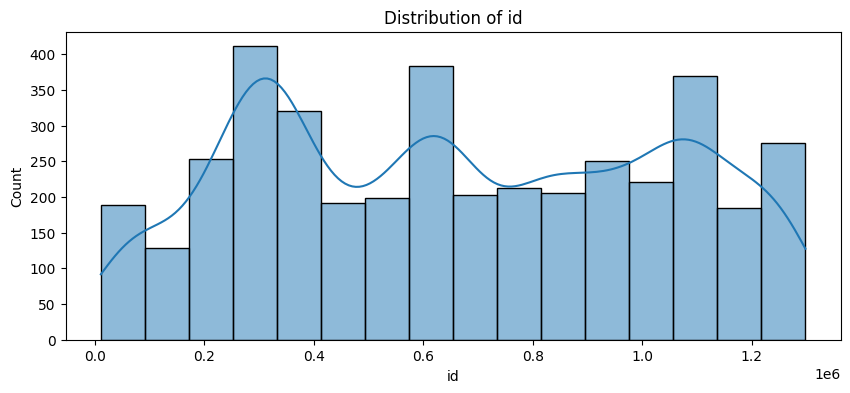

Summary statistics for id:
count    3.998000e+03
mean     6.637945e+05
std      3.632182e+05
min      1.124400e+04
25%      3.342842e+05
50%      6.396000e+05
75%      9.904800e+05
max      1.298275e+06
Name: id, dtype: float64


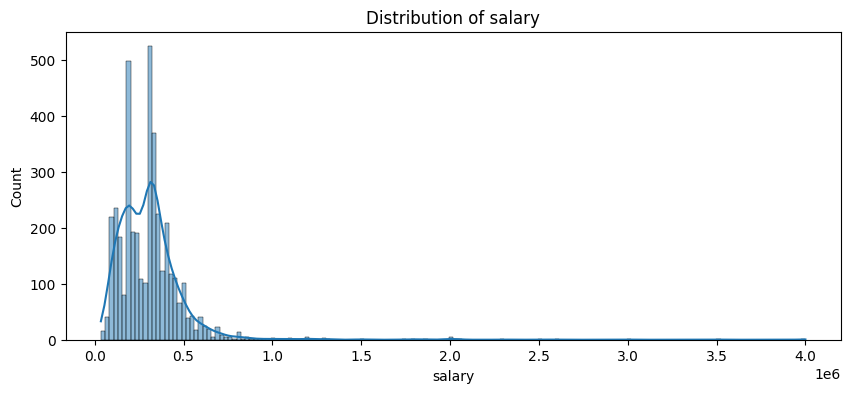

Summary statistics for salary:
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: salary, dtype: float64


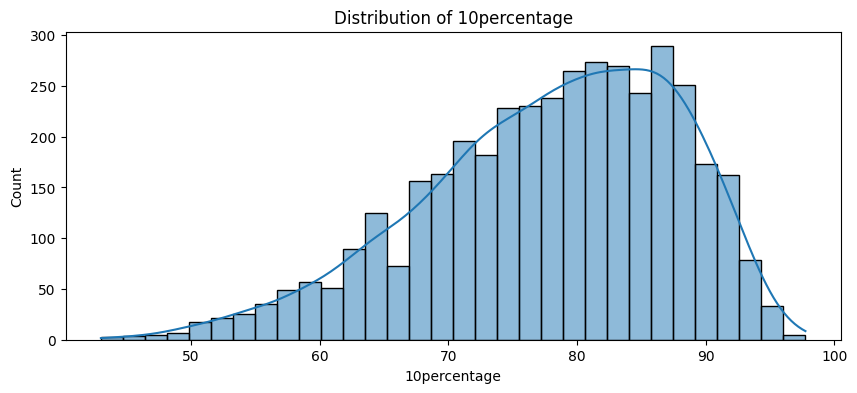

Summary statistics for 10percentage:
count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64


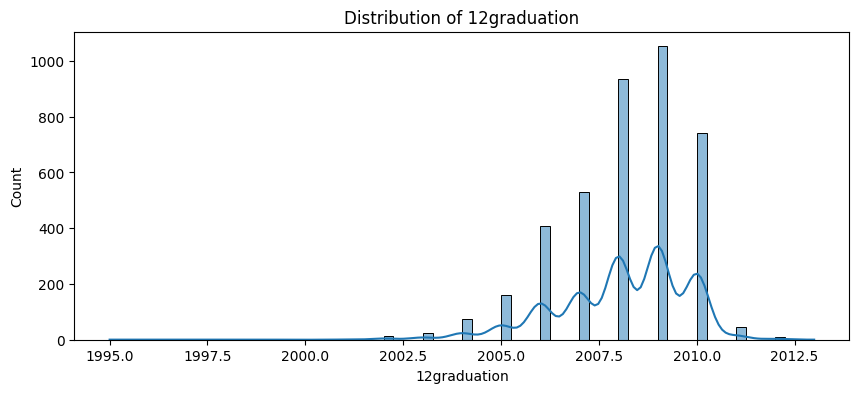

Summary statistics for 12graduation:
count    3998.000000
mean     2008.087544
std         1.653599
min      1995.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2013.000000
Name: 12graduation, dtype: float64


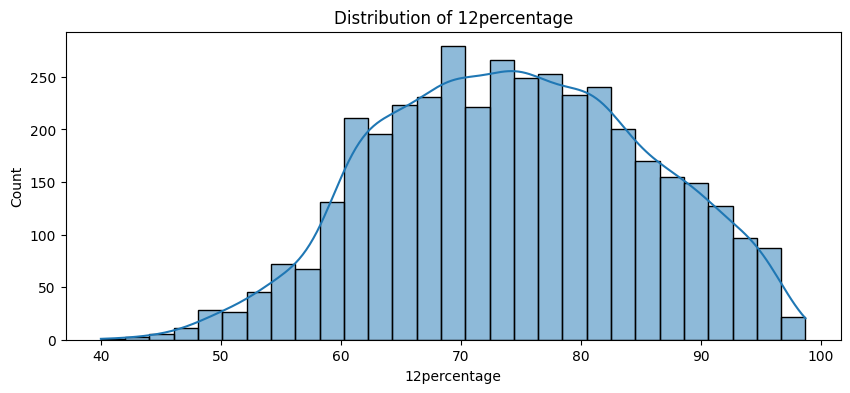

Summary statistics for 12percentage:
count    3998.000000
mean       74.466366
std        10.999933
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64


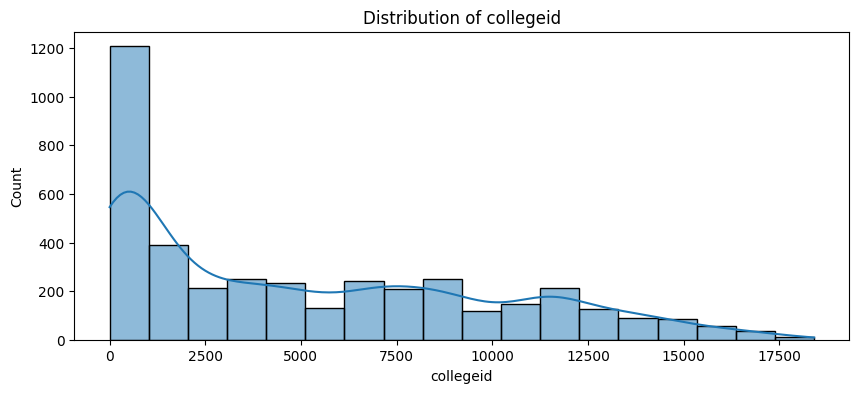

Summary statistics for collegeid:
count     3998.000000
mean      5156.851426
std       4802.261482
min          2.000000
25%        494.000000
50%       3879.000000
75%       8818.000000
max      18409.000000
Name: collegeid, dtype: float64


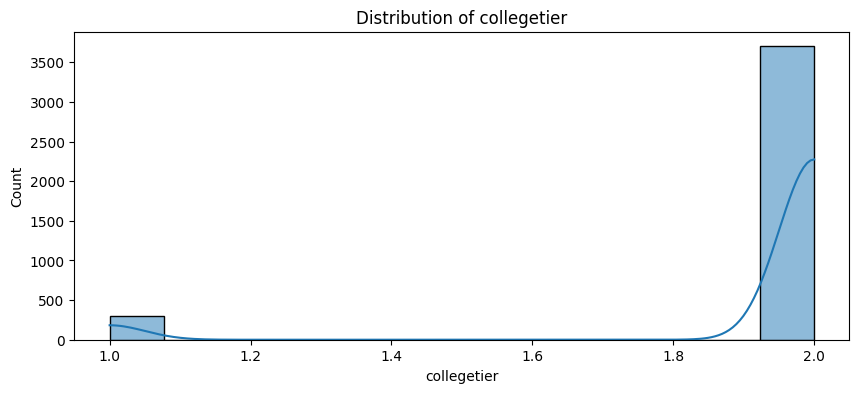

Summary statistics for collegetier:
count    3998.000000
mean        1.925713
std         0.262270
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: collegetier, dtype: float64


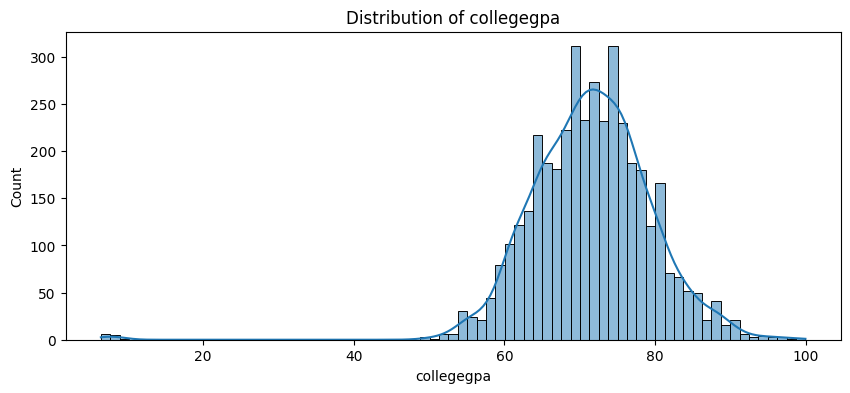

Summary statistics for collegegpa:
count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegegpa, dtype: float64


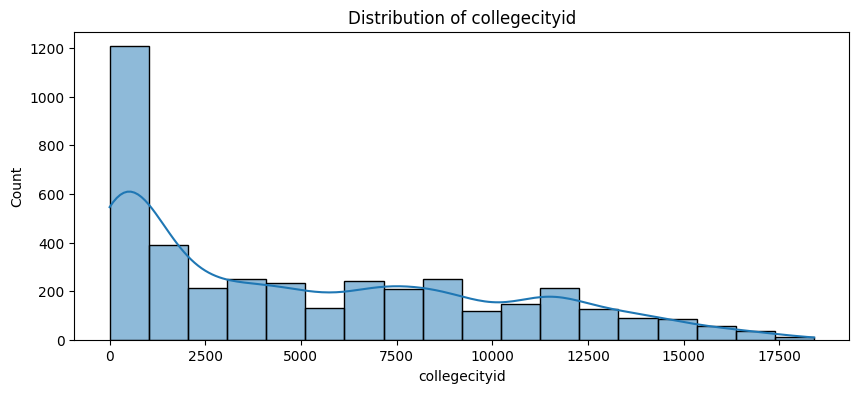

Summary statistics for collegecityid:
count     3998.000000
mean      5156.851426
std       4802.261482
min          2.000000
25%        494.000000
50%       3879.000000
75%       8818.000000
max      18409.000000
Name: collegecityid, dtype: float64


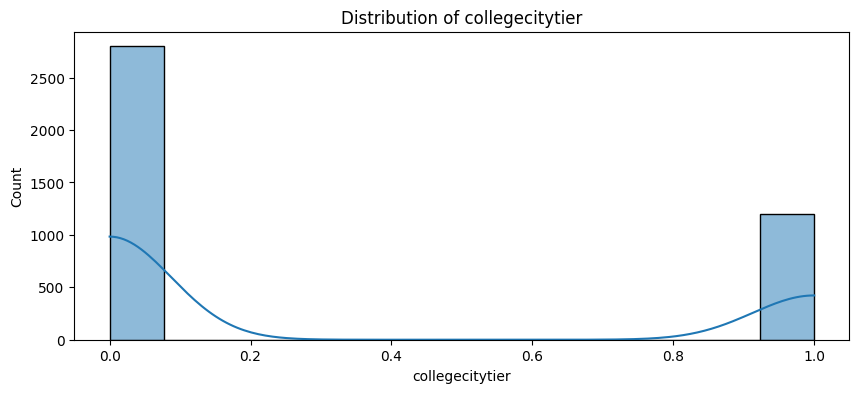

Summary statistics for collegecitytier:
count    3998.000000
mean        0.300400
std         0.458489
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: collegecitytier, dtype: float64


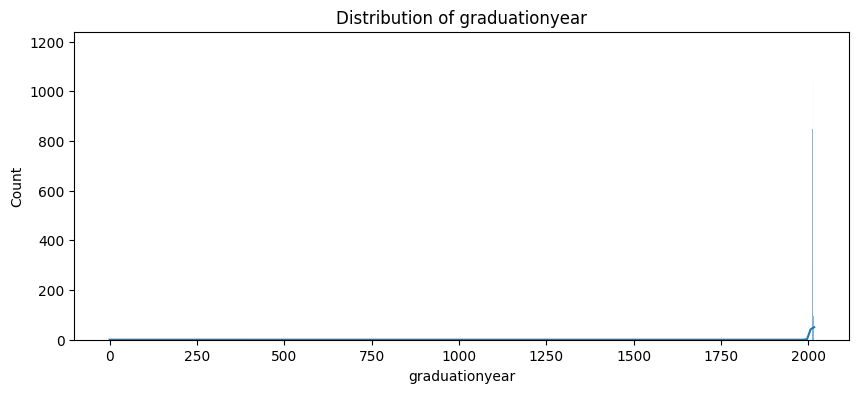

Summary statistics for graduationyear:
count    3998.000000
mean     2012.105803
std        31.857271
min         0.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: graduationyear, dtype: float64


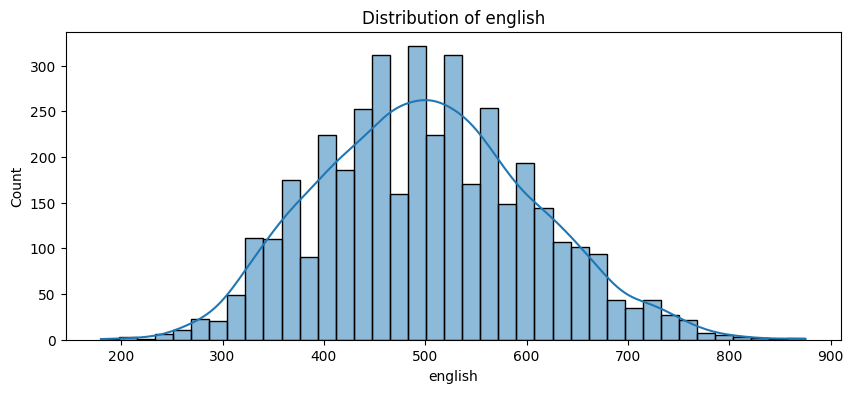

Summary statistics for english:
count    3998.000000
mean      501.649075
std       104.940021
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: english, dtype: float64


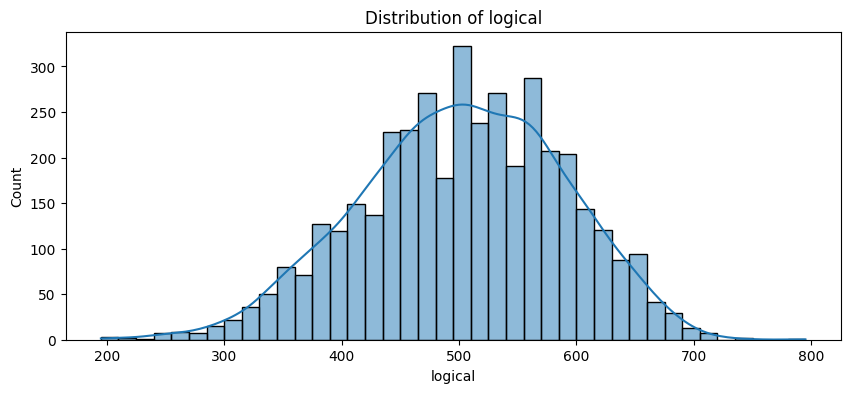

Summary statistics for logical:
count    3998.000000
mean      501.598799
std        86.783297
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: logical, dtype: float64


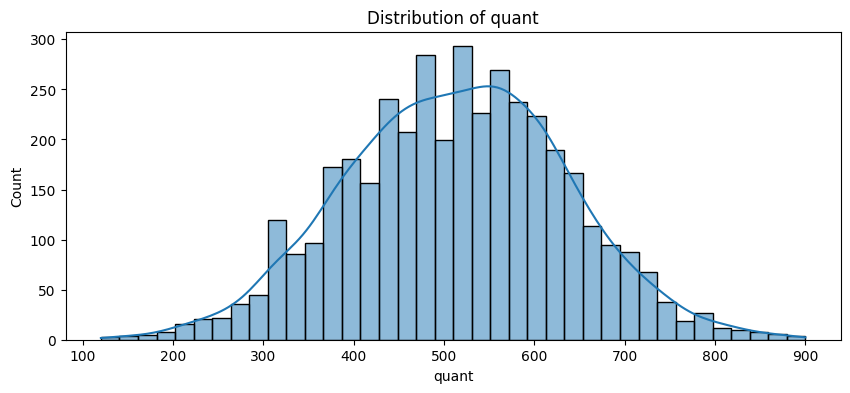

Summary statistics for quant:
count    3998.000000
mean      513.378189
std       122.302332
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: quant, dtype: float64


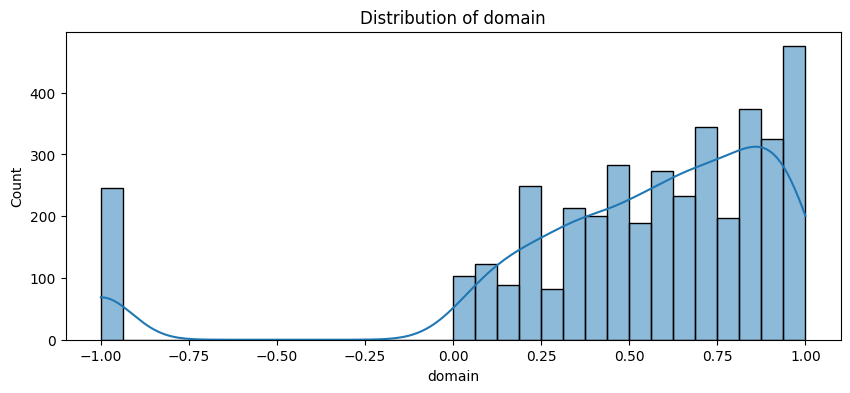

Summary statistics for domain:
count    3998.000000
mean        0.510490
std         0.468671
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.842248
max         0.999910
Name: domain, dtype: float64


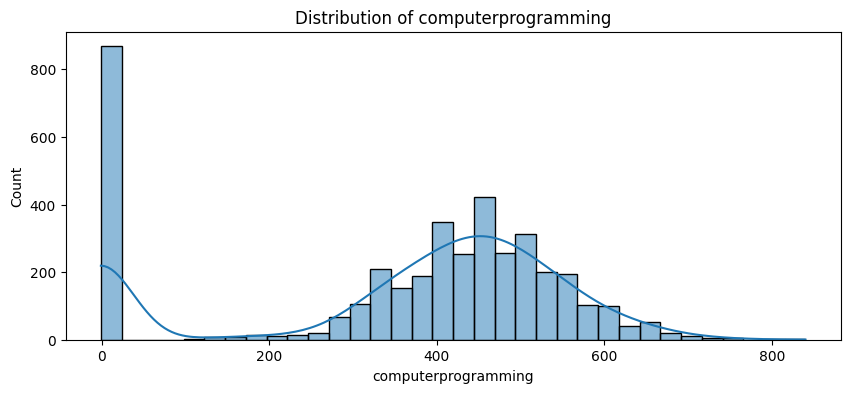

Summary statistics for computerprogramming:
count    3998.000000
mean      353.102801
std       205.355519
min        -1.000000
25%       295.000000
50%       415.000000
75%       495.000000
max       840.000000
Name: computerprogramming, dtype: float64


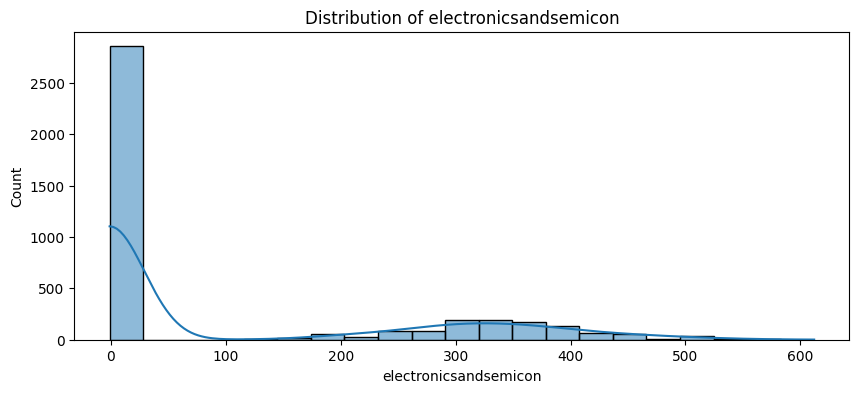

Summary statistics for electronicsandsemicon:
count    3998.000000
mean       95.328414
std       158.241218
min        -1.000000
25%        -1.000000
50%        -1.000000
75%       233.000000
max       612.000000
Name: electronicsandsemicon, dtype: float64


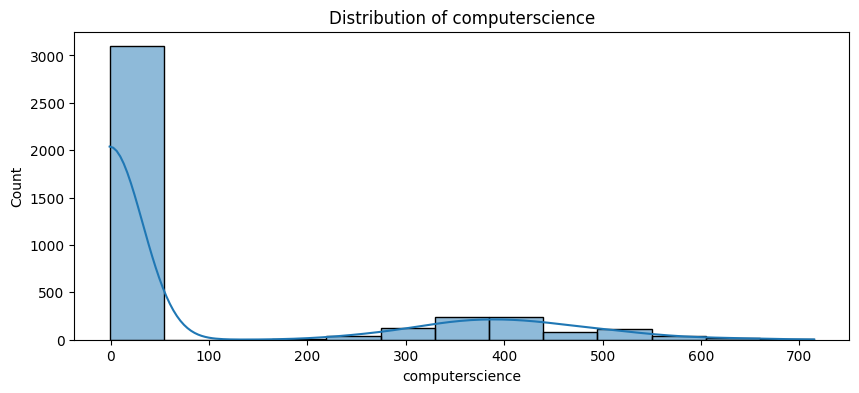

Summary statistics for computerscience:
count    3998.000000
mean       90.742371
std       175.273083
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       715.000000
Name: computerscience, dtype: float64


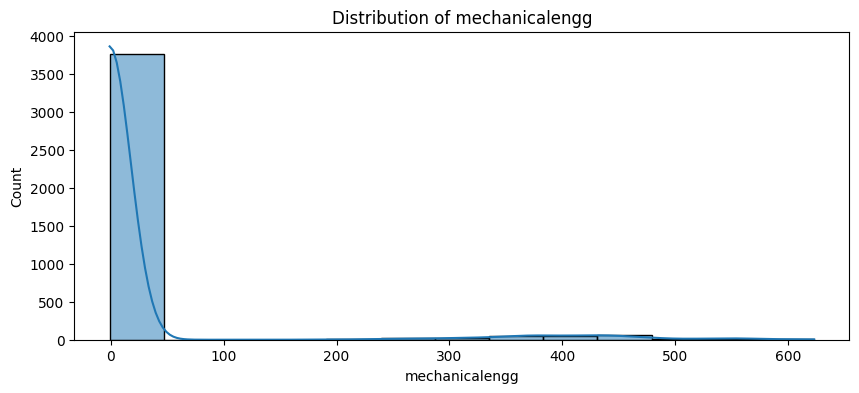

Summary statistics for mechanicalengg:
count    3998.000000
mean       22.974737
std        98.123311
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       623.000000
Name: mechanicalengg, dtype: float64


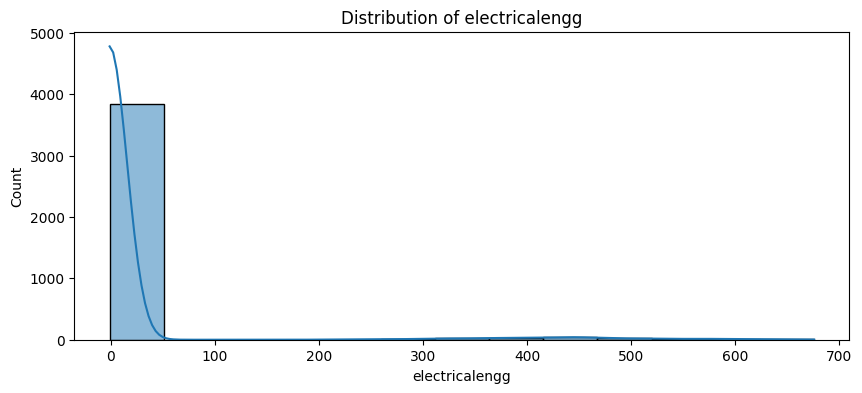

Summary statistics for electricalengg:
count    3998.000000
mean       16.478739
std        87.585634
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       676.000000
Name: electricalengg, dtype: float64


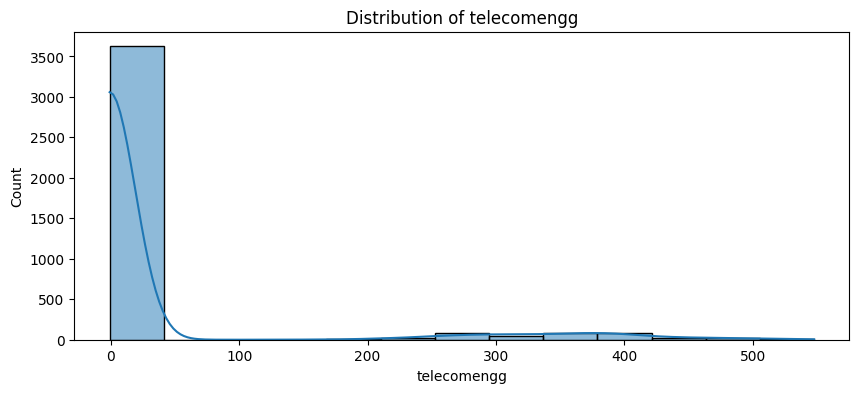

Summary statistics for telecomengg:
count    3998.000000
mean       31.851176
std       104.852845
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       548.000000
Name: telecomengg, dtype: float64


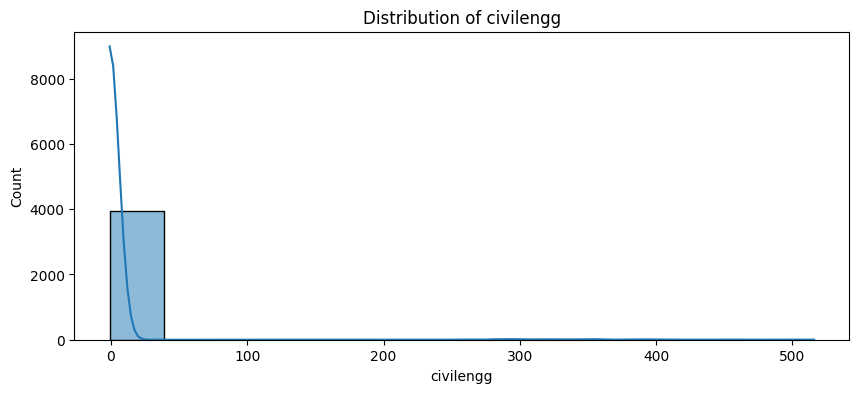

Summary statistics for civilengg:
count    3998.000000
mean        2.683842
std        36.658505
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       516.000000
Name: civilengg, dtype: float64


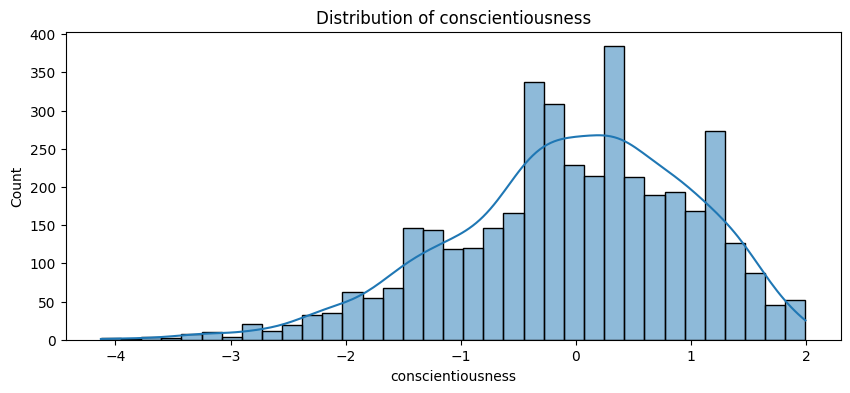

Summary statistics for conscientiousness:
count    3998.000000
mean       -0.037831
std         1.028666
min        -4.126700
25%        -0.713525
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64


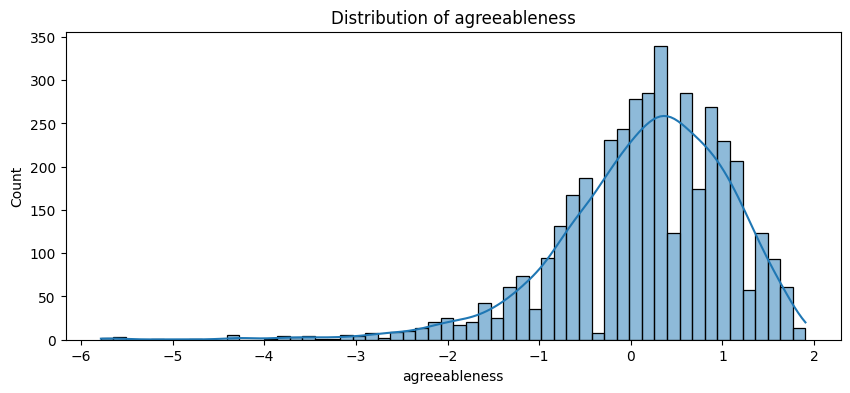

Summary statistics for agreeableness:
count    3998.000000
mean        0.146496
std         0.941782
min        -5.781600
25%        -0.287100
50%         0.212400
75%         0.812800
max         1.904800
Name: agreeableness, dtype: float64


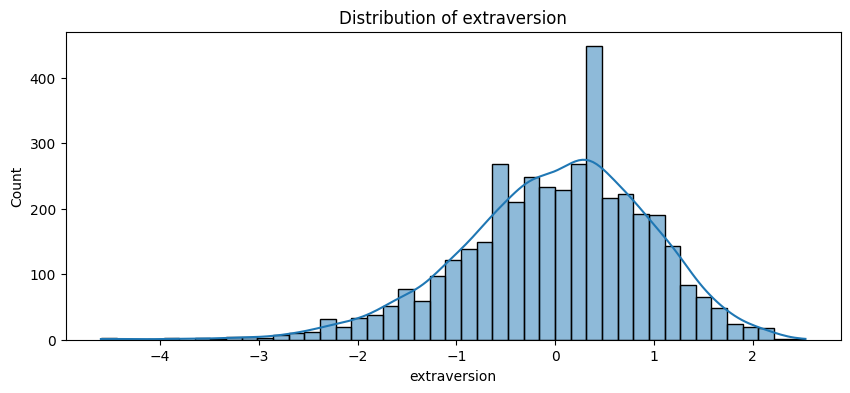

Summary statistics for extraversion:
count    3998.000000
mean        0.002763
std         0.951471
min        -4.600900
25%        -0.604800
50%         0.091400
75%         0.672000
max         2.535400
Name: extraversion, dtype: float64


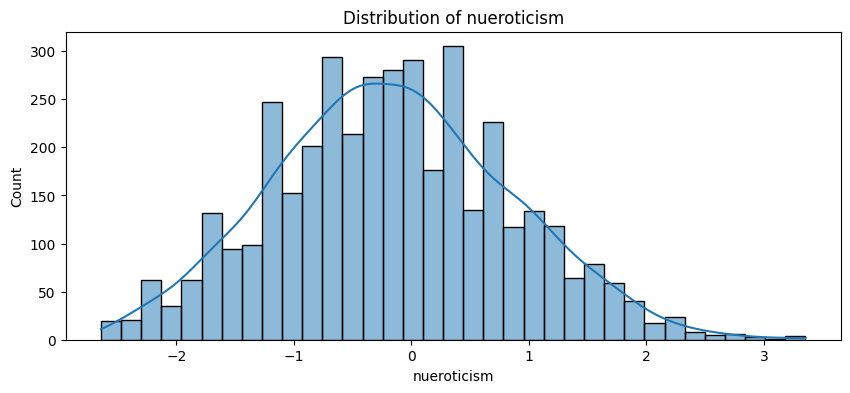

Summary statistics for nueroticism:
count    3998.000000
mean       -0.169033
std         1.007580
min        -2.643000
25%        -0.868200
50%        -0.234400
75%         0.526200
max         3.352500
Name: nueroticism, dtype: float64


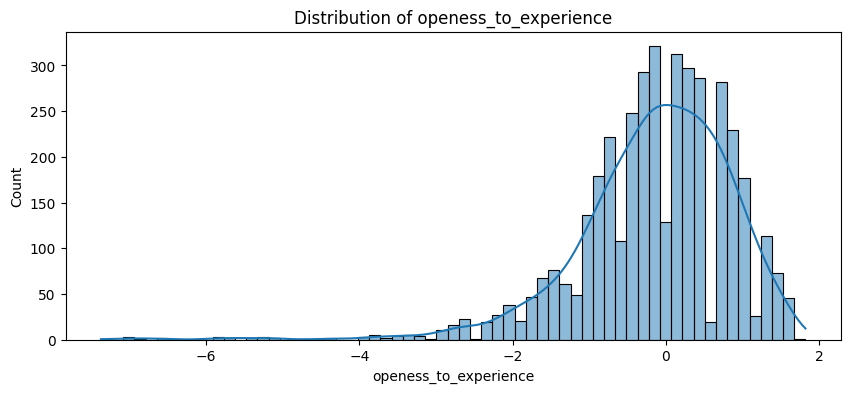

Summary statistics for openess_to_experience:
count    3998.000000
mean       -0.138110
std         1.008075
min        -7.375700
25%        -0.669200
50%        -0.094300
75%         0.502400
max         1.822400
Name: openess_to_experience, dtype: float64


In [50]:
# Step 3: Univariate Analysis
def plot_numerical_distribution(column):
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
    print(f"Summary statistics for {column}:")
    print(df[column].describe())

for column in num:
  if df[column].dtype == 'float64' or df[column].dtype == 'int64':
    plot_numerical_distribution(column)


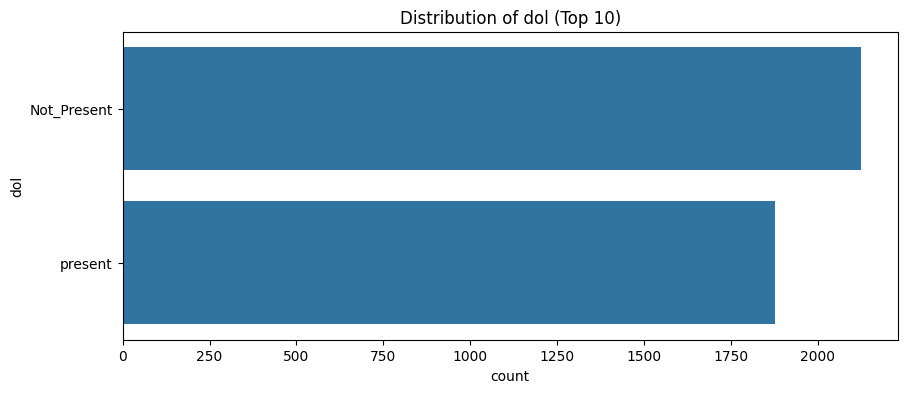


Value counts for dol (Top 10):
dol
Not_Present    2123
present        1875
Name: count, dtype: int64


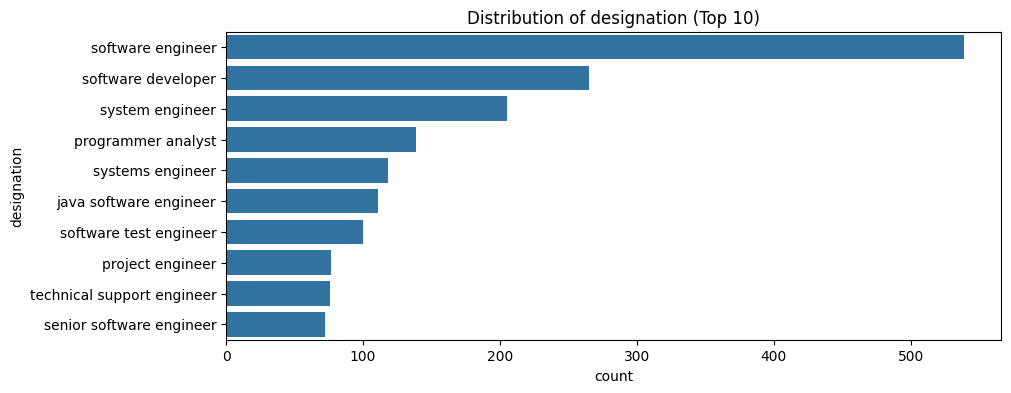


Value counts for designation (Top 10):
designation
software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
Name: count, dtype: int64


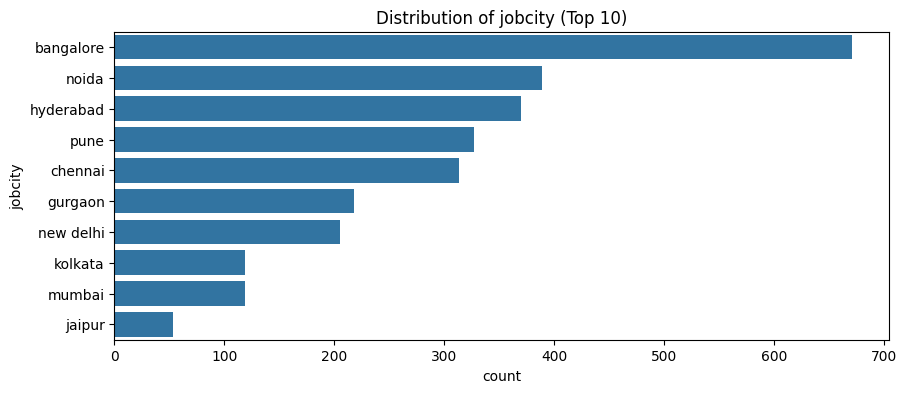


Value counts for jobcity (Top 10):
jobcity
bangalore    671
noida        389
hyderabad    370
pune         327
chennai      313
gurgaon      218
new delhi    205
kolkata      119
mumbai       119
jaipur        53
Name: count, dtype: int64


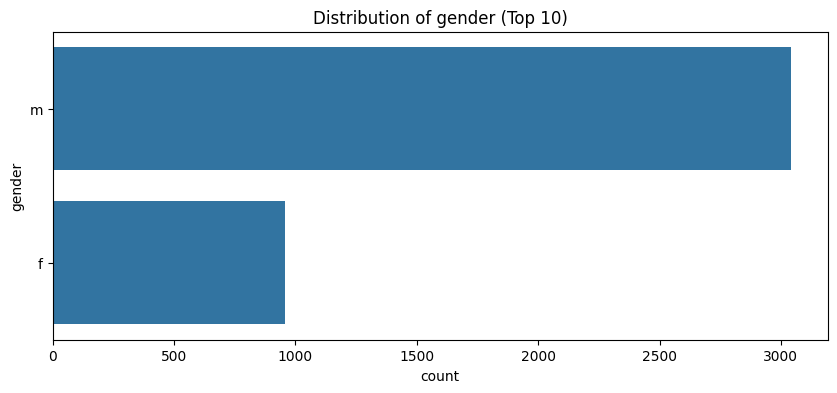


Value counts for gender (Top 10):
gender
m    3041
f     957
Name: count, dtype: int64


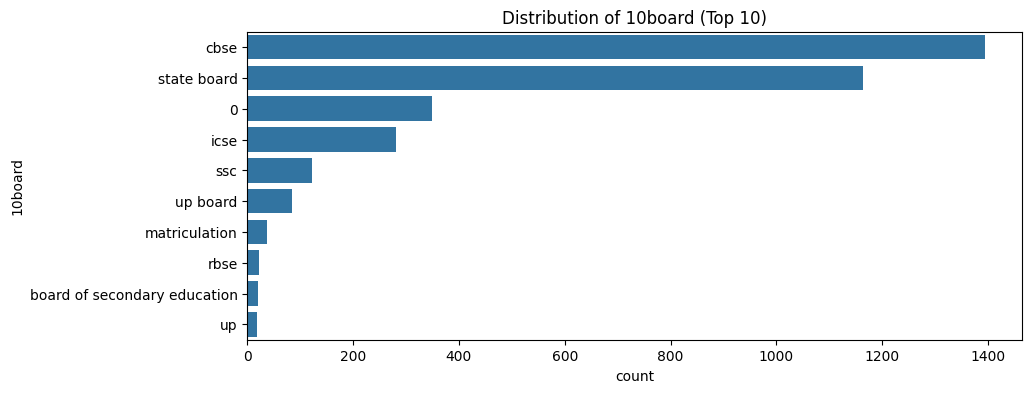


Value counts for 10board (Top 10):
10board
cbse                            1395
state board                     1164
0                                350
icse                             281
ssc                              122
up board                          85
matriculation                     38
rbse                              23
board of secondary education      20
up                                19
Name: count, dtype: int64


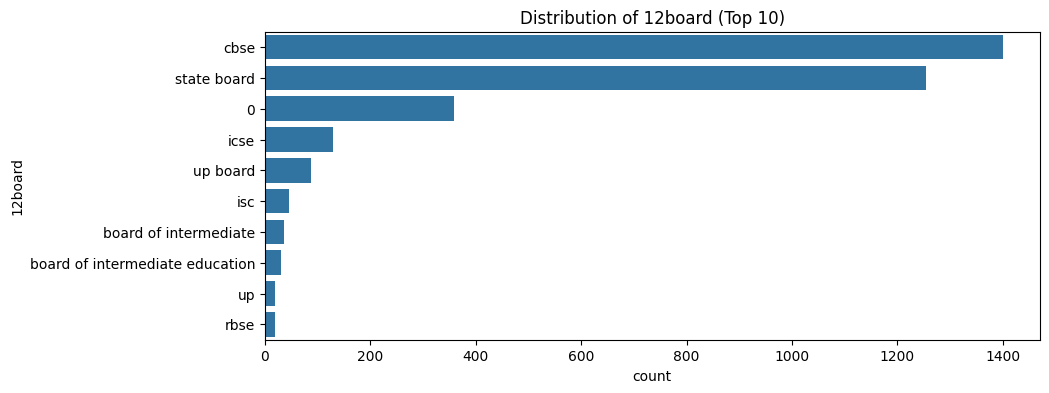


Value counts for 12board (Top 10):
12board
cbse                               1400
state board                        1254
0                                   359
icse                                129
up board                             87
isc                                  45
board of intermediate                36
board of intermediate education      31
up                                   20
rbse                                 19
Name: count, dtype: int64


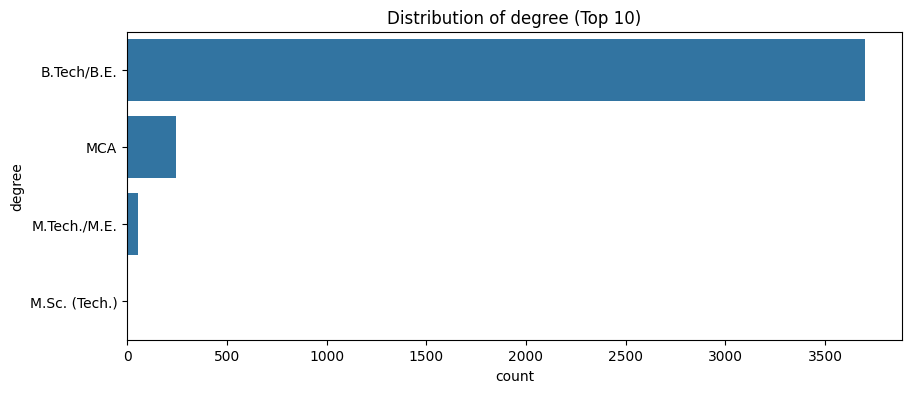


Value counts for degree (Top 10):
degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64


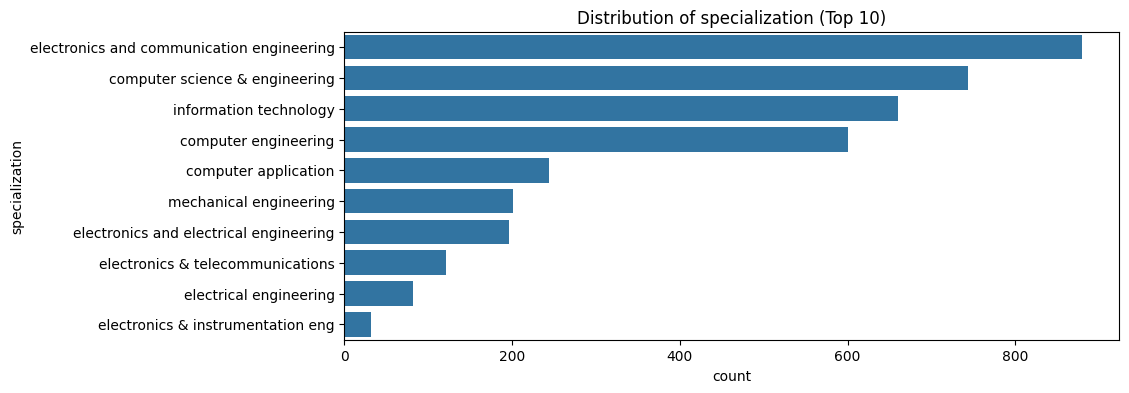


Value counts for specialization (Top 10):
specialization
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: count, dtype: int64


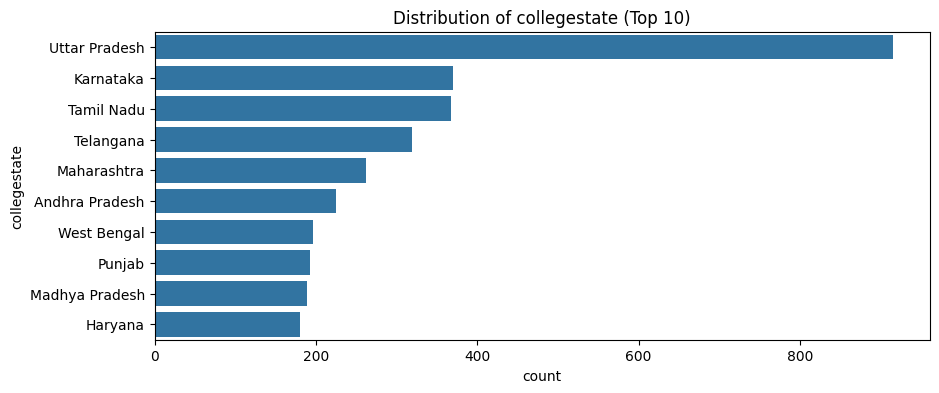


Value counts for collegestate (Top 10):
collegestate
Uttar Pradesh     915
Karnataka         370
Tamil Nadu        367
Telangana         319
Maharashtra       262
Andhra Pradesh    225
West Bengal       196
Punjab            193
Madhya Pradesh    189
Haryana           180
Name: count, dtype: int64


In [54]:

def plot_categorical_distribution_sns(column):
  """Plots the distribution of a categorical column using seaborn barplot."""

  d1 = df[column].value_counts().head(10).reset_index()
  d1.columns = [column, 'count']
  plt.figure(figsize=(10, 4))
  sns.barplot(y=d1[column], x=d1["count"] )
  plt.title(f'Distribution of {column} (Top 10)')
  plt.show()
  print(f"\nValue counts for {column} (Top 10):")
  print(df[column].value_counts().head(10))

# Now, you can use this function for categorical columns:
for column in cat:
  if df[column].dtype == 'object':
    plot_categorical_distribution_sns(column)


**Step - 4 - Bivariate Analysis**

---



Numerical vs. Numerical

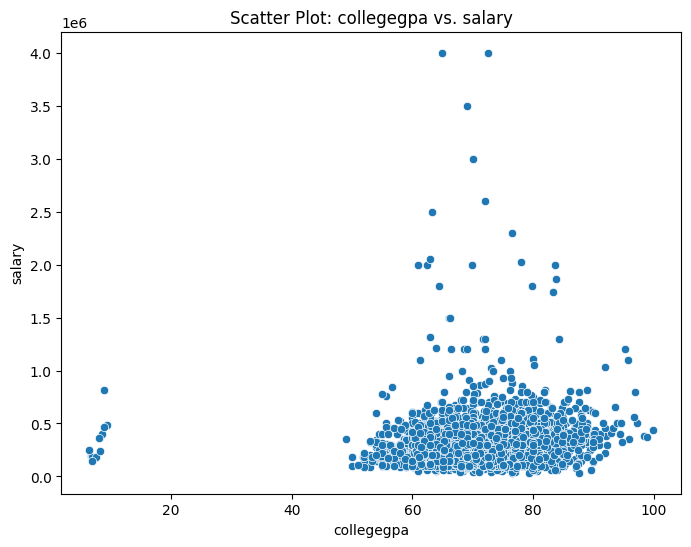

Observation:  Check for correlation and potential outliers in the relationship between collegegpa and salary.


<Figure size 800x600 with 0 Axes>

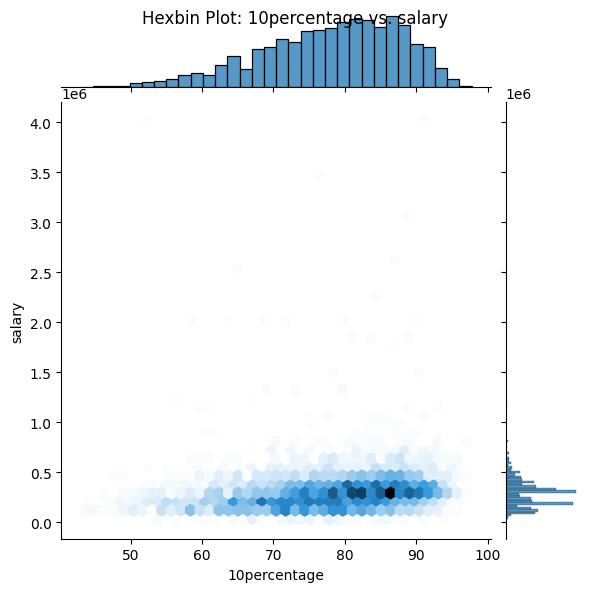

Observation:  Visualize the density of data points and potential clusters in the relationship between 10percentage and salary.


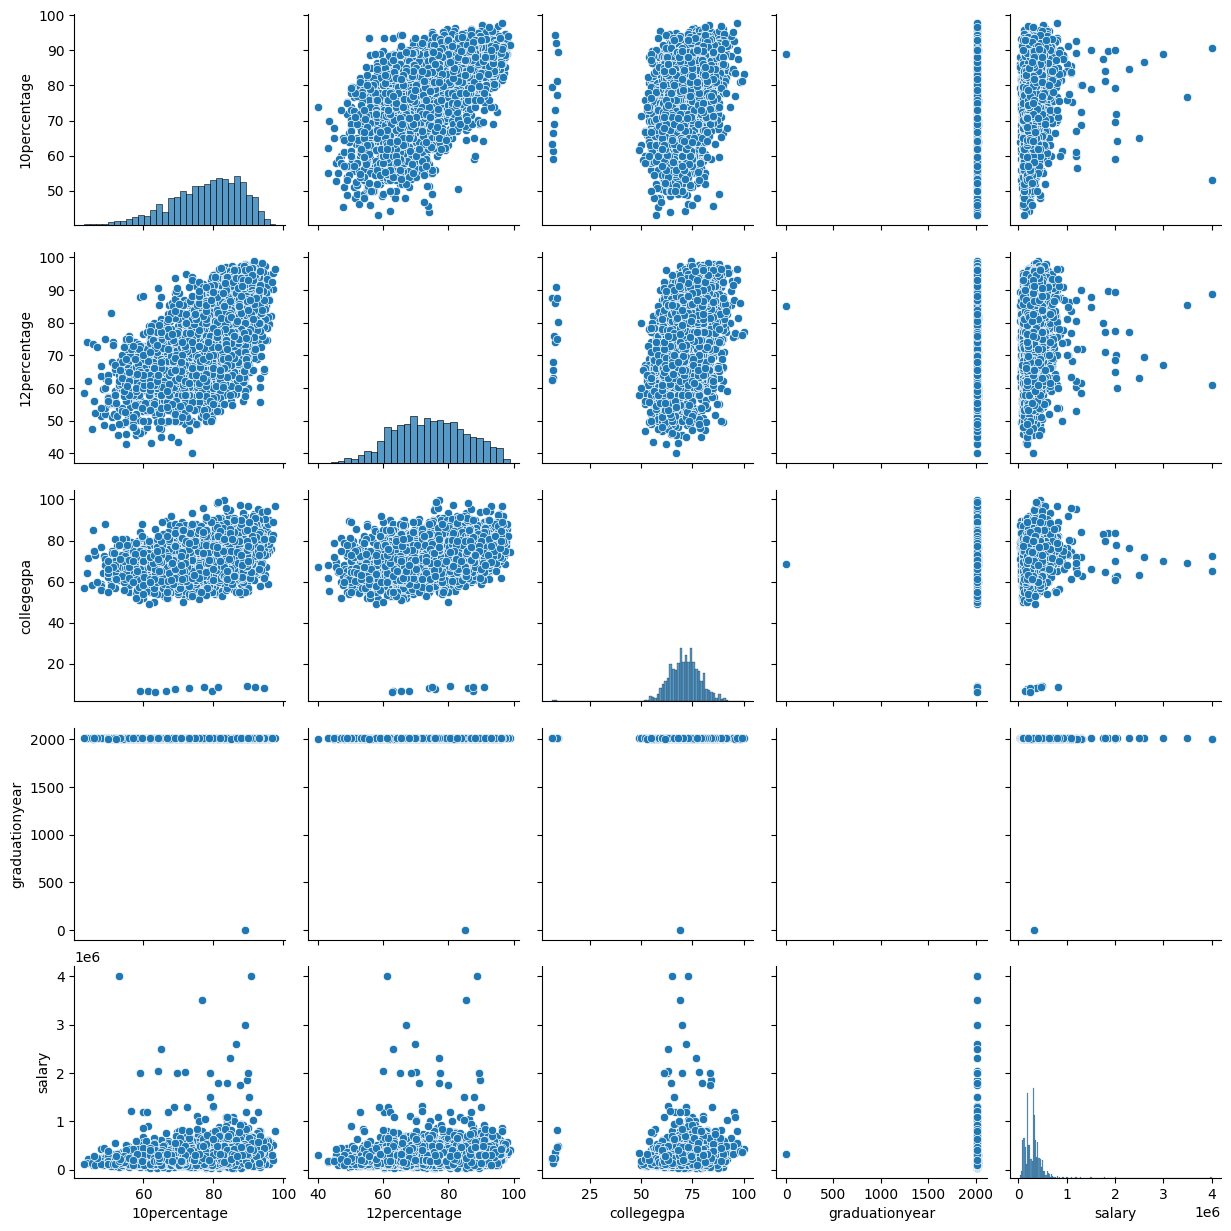

Observation:  Quickly visualize relationships between multiple numerical columns and identify any potential correlations.


In [58]:

def plot_scatter_plot(x_col, y_col):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.title(f'Scatter Plot: {x_col} vs. {y_col}')
    plt.show()
    print(f"Observation:  Check for correlation and potential outliers in the relationship between {x_col} and {y_col}.")

# Scatter plot
plot_scatter_plot('collegegpa', 'salary')


def plot_hexbin_plot(x_col, y_col):
    plt.figure(figsize=(8, 6))
    sns.jointplot(x=x_col, y=y_col, data=df, kind='hex')
    plt.suptitle(f'Hexbin Plot: {x_col} vs. {y_col}')
    plt.show()
    print(f"Observation:  Visualize the density of data points and potential clusters in the relationship between {x_col} and {y_col}.")


# Hexbin plot
plot_hexbin_plot('10percentage', 'salary')


def plot_pair_plot(columns):
    sns.pairplot(df[columns])
    plt.show()
    print(f"Observation:  Quickly visualize relationships between multiple numerical columns and identify any potential correlations.")


# Pair plot
plot_pair_plot(['10percentage', '12percentage', 'collegegpa','graduationyear','salary'])


Categorical vs Numerical

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


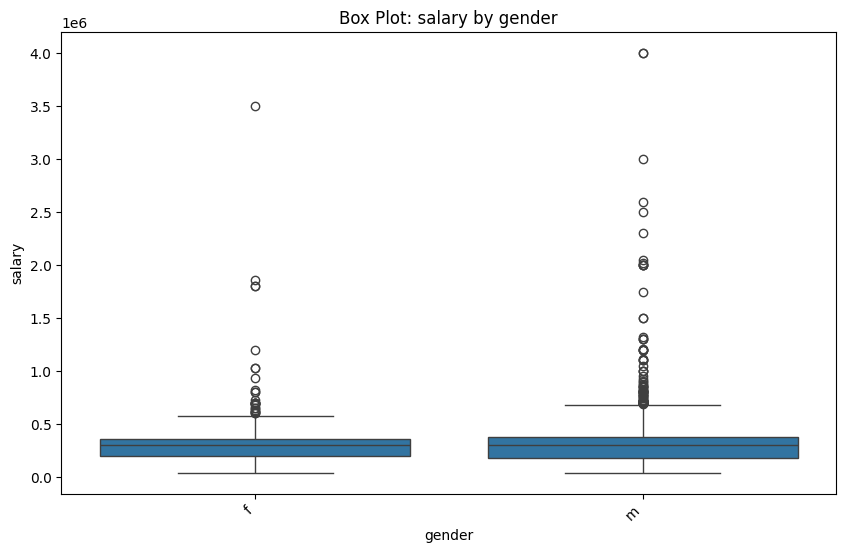

Observation: Observe the distribution of salary for each category of gender. Check for differences in the median, quartiles, and presence of outliers.


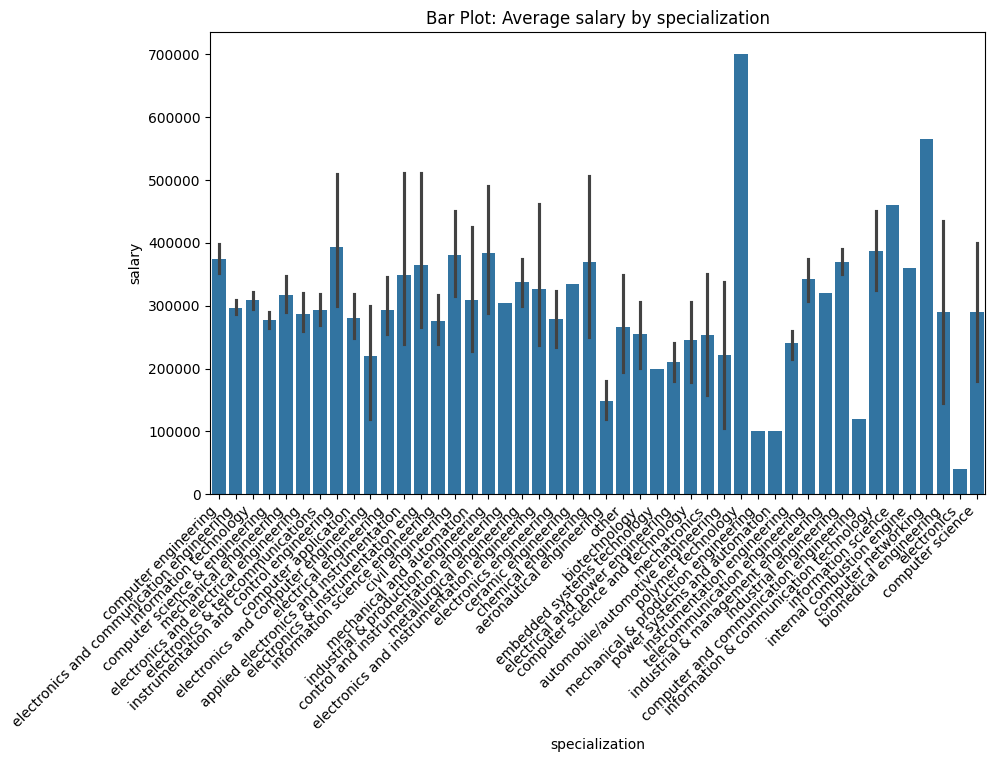

Observation: Compare the average salary across different categories of specialization.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-

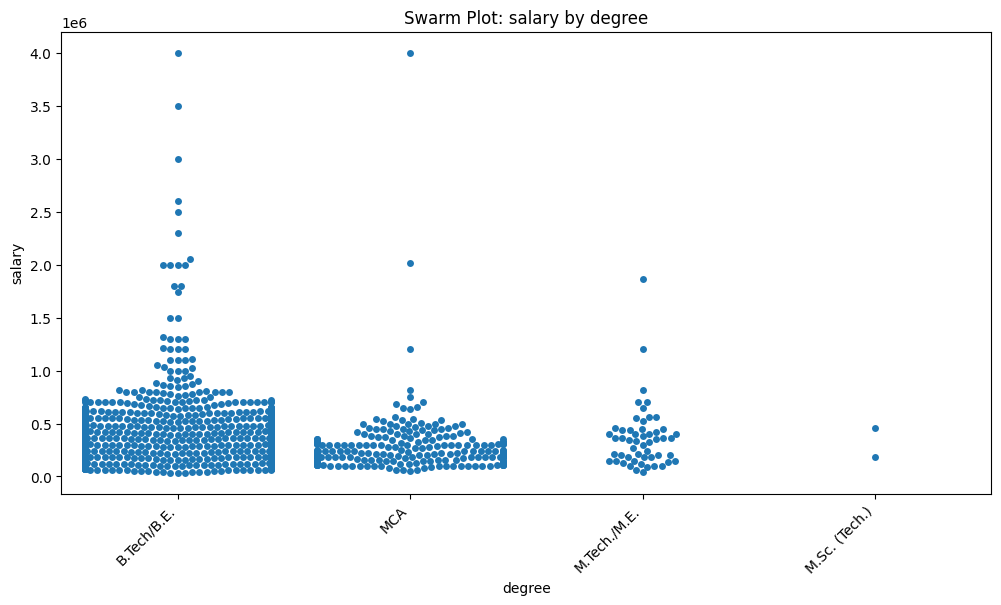

Observation: Observe the distribution of salary for each category of degree, especially if there are many data points.


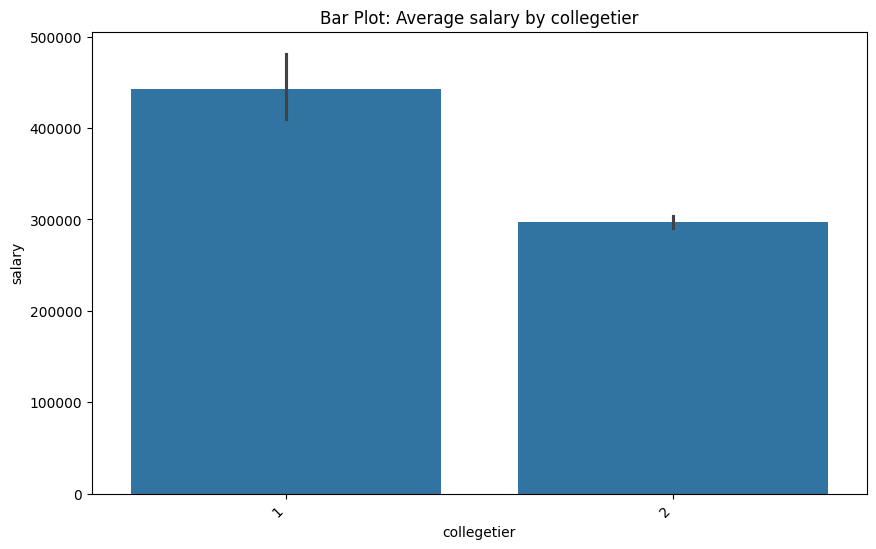

Observation: Compare the average salary across different categories of collegetier.


In [68]:
def plot_box_plot(x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title(f'Box Plot: {y_col} by {x_col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    print(f"Observation: Observe the distribution of {y_col} for each category of {x_col}. Check for differences in the median, quartiles, and presence of outliers.")

plot_box_plot('gender', 'salary')
def plot_bar_plot_categorical_numerical(x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_col, y=y_col, data=df, estimator=np.mean)
    plt.title(f'Bar Plot: Average {y_col} by {x_col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()
    print(f"Observation: Compare the average {y_col} across different categories of {x_col}.")

plot_bar_plot_categorical_numerical('specialization', 'salary')


def plot_swarm_plot(x_col, y_col):
  plt.figure(figsize=(12, 6))
  sns.swarmplot(x=x_col, y=y_col, data=df)
  plt.title(f'Swarm Plot: {y_col} by {x_col}')
  plt.xticks(rotation=45, ha='right')
  plt.show()
  print(f"Observation: Observe the distribution of {y_col} for each category of {x_col}, especially if there are many data points.")


#  Swarm plot
plot_swarm_plot('degree', 'salary')


def plot_bar_plot_categorical_numerical(x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_col, y=y_col, data=df, estimator=np.mean)
    plt.title(f'Bar Plot: Average {y_col} by {x_col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()
    print(f"Observation: Compare the average {y_col} across different categories of {x_col}.")


#  Bar plot
plot_bar_plot_categorical_numerical('collegetier', 'salary')

 Categorical vs Categorical

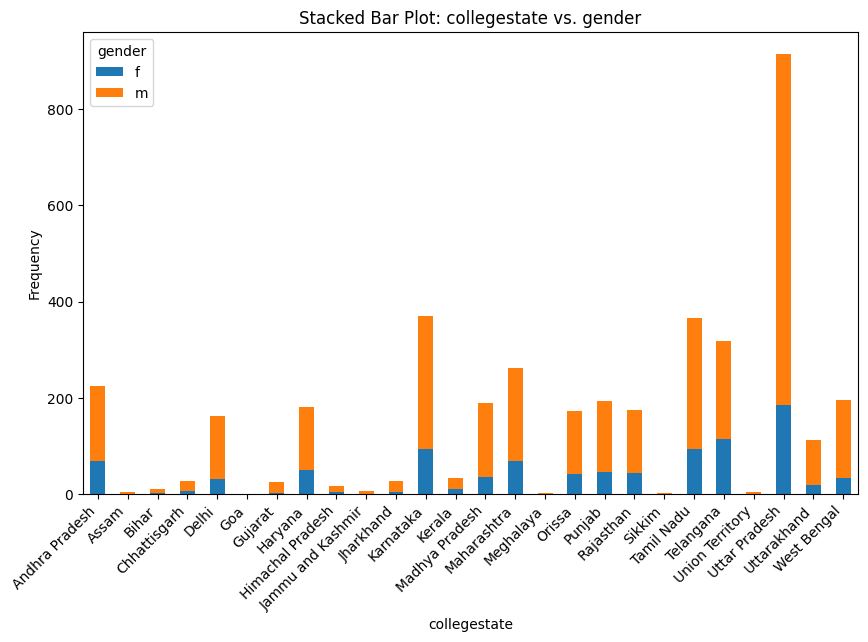

Observation: Examine the distribution of gender categories for each value of collegestate.


In [60]:
def plot_stacked_bar_plot(x_col, y_col):
    pd.crosstab(df[x_col], df[y_col]).plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Bar Plot: {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    print(f"Observation: Examine the distribution of {y_col} categories for each value of {x_col}.")

plot_stacked_bar_plot('collegestate','gender')

**Step 5**

*Times of India article dated Jan 18, 2019 states that “After doing your
Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate."*

In [70]:
from scipy import stats
relevant_roles = ['programmer Analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_df = df[df['designation'].isin(relevant_roles)]
salary_data = filtered_df['salary']
claimed_mean_salary = 2.75 * 100000 # Convert lakhs to the actual unit (e.g.,2.75 lakhs = 275000)
t_stat, p_value = stats.ttest_1samp(salary_data, claimed_mean_salary)
print(f"Mean Salary of Selected Roles: {salary_data.mean():.2f}")
print(f"Claimed Mean Salary: {claimed_mean_salary:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: The average salary is significantly different from the claimed mean.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between the average salary and the claimed mean.")


Mean Salary of Selected Roles: 339792.04
Claimed Mean Salary: 275000.00
T-statistic: 10.55
P-value: 0.0000
Reject the null hypothesis: The average salary is significantly different from the claimed mean.


In [72]:
from scipy import stats as st
cont_table=pd.crosstab(index=df["specialization"],columns=df["gender"])
Chi2_stat,p_value,dof,exp_freq=st.chi2_contingency(cont_table)
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between the gender and Specialization.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between the gender and Specialization.")

Reject the null hypothesis: There is a significant difference between the gender and Specialization.


**Conclusion**


Based on the EDA conducted on the AMCAT dataset, we've gained valuable insights into factors influencing job placement and salaries for engineering graduates.
**Key Findings:**
**Location Matters:** Job location plays a significant role in salary levels, with certain cities offering higher average salaries.
**Specialization Influence:** The field of specialization significantly influences the average salary obtained by the graduate.
**Academic Performance:** The academic performance of students throughout their schooling and college appears to be positively correlated with salary.
**Gender and Specialization:** There is no significant difference in the distribution of gender across various specializations
**Role and Salary Claim:** Analysis of salary data for specific roles (programmer Analyst, software engineer, hardware engineer, and associate engineer) revealed that the average salary for fresh graduates in these roles differs significantly from the claimed mean of 2.75 lakhs.
**Recommendations:**
**Further Analysis:** Deeper dive into the relationship between salary and other variables, such as communication skills, personality traits and coding skills, for a comprehensive understanding of the factors influencing salary.
**Targeted Career Counseling:** Provide guidance to students on the correlation between their academic performance, chosen specialization and desired job location to help them make informed career choices.
**Location-Based Strategies:** Offer tailored training and recruitment programs for students based on job market demands in particular locations.
By leveraging these insights, educational institutions, training organizations, and recruitment agencies can enhance career guidance and assist students in navigating the job market effectively.


**STEP 7**

Research Question 2:
Does the location of the college (tier and state) significantly impact the salary potential for graduates?
(Consider comparing tier-1 colleges with tier-2 and tier-3 colleges within different states)

Research Question 3:
Is there a significant relationship between the type of degree (B.Tech, M.Tech, etc.) and the average salary or type of job?

Research Question 4:
Do candidates with higher communication skills or logical reasoning ability tend to command higher salaries?

Research Question 5:
How does the level of coding skills influence the placement success and salary for graduates?

These are just some examples of interesting research questions that can be further explored with the AMCAT dataset.
